In [1]:
from annainflux import client
import pandas as pd

In [2]:
rs = client.query("SHOW TAG VALUES FROM dependencies WITH KEY=project")
nodes = pd.DataFrame(rs.get_points())
nodes = nodes.drop(columns=['key'])
nodes = nodes.append({'value': 'qtbase'}, ignore_index=True)

projects = nodes['value'].tolist()

In [3]:
rs = client.query("SELECT * FROM dependencies")
links = pd.DataFrame(rs.get_points())
links = links.drop(columns=['branch', 'depHeadSha1', 'time'])
links = links.rename(columns={"project": "source", "dependency": "target", "howFar": "value"})


In [4]:

from pandas import DataFrame
data = DataFrame(0, index=projects, columns=projects)
for i in range (links.shape[0]):        
    data[links.iloc[ i , : ]['source']    ][links.iloc[ i , : ]['target']] = links.iloc[ i , : ]['value']    

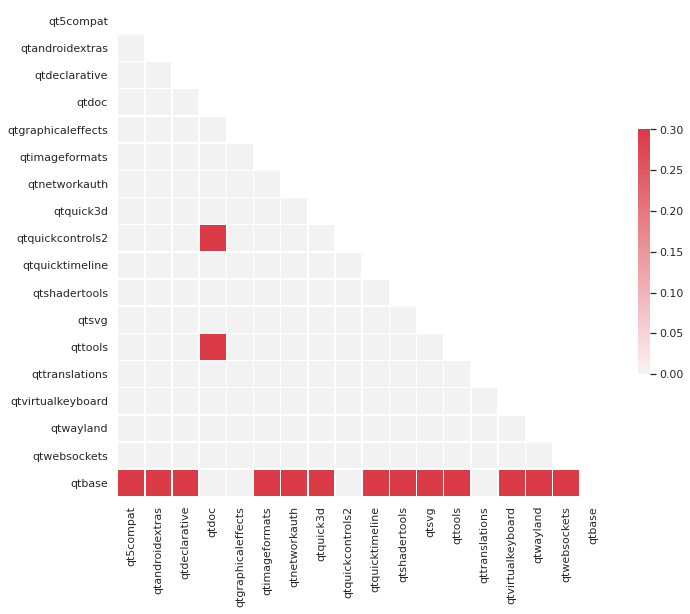

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#corr = data.corr()

sns.set(style="white")
mask = np.triu(np.ones_like(data, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
